In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("./data/graduation_gender_insgesamt.csv", delimiter=";")

# drop column 'Schulform' because it does not hold any import information and has the same value in each row.
df2 = df.drop(columns='Schulform')

# replace values '-' with 0. For now, the dataframe does not show any null-values, because the dataset has '-' as null-values.
df3 = df2.replace(to_replace='-', value=0)

# change values from object to integer
df3.iloc[:, 2:38] = df3.iloc[:, 2:38].astype(int)

df = df3


/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_1558/1521931498.py:15: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df3.iloc[:, 2:38] = df3.iloc[:, 2:38].astype(int)


In [61]:
df.head(12)

,Bundesland,Schulabschluss,09_10_m,09_10_w,09_10_ins,10_11_m,10_11_w,10_11_ins,11_12_m,11_12_w,...,17_18_ins,18_19_m,18_19_w,18_19_ins,19_20_m,19_20_w,19_20_ins,20_21_m,20_21_w,20_21_ins
0,Baden-Württemberg,Ohne Hauptschulabschluss,3798,2447,6245,3532,2390,5922,3575,2376,...,6951,3935,2346,6281,3484,2128,5612,3860,2349,6209
1,Baden-Württemberg,Hauptschulabschluss,18043,13956,31999,17413,13399,30812,13295,10009,...,17493,10401,6690,17091,10433,7016,17449,9812,6383,16195
2,Baden-Württemberg,Mittlerer Schulabschluss,25136,25014,50150,24660,24567,49227,25364,25291,...,50602,26049,24718,50767,26254,24413,50667,24771,23688,48459
3,Baden-Württemberg,Fachhochschulreife,164,149,313,136,174,310,180,200,...,350,184,204,388,196,193,389,194,194,388
4,Baden-Württemberg,Allgemeine Hochschulreife,15258,18751,34009,15835,19539,35374,27498,32040,...,33109,14405,17448,31853,13414,16129,29543,12939,15506,28445
5,Baden-Württemberg,Insgesamt,62399,60317,122716,61576,60069,121645,69912,69916,...,108505,54974,51406,106380,53781,49879,103660,51576,48120,99696
6,Bayern,Ohne Hauptschulabschluss,4700,2879,7579,4314,2669,6983,3979,2480,...,7414,4450,2524,6974,3690,2274,5964,3914,2240,6154
7,Bayern,Hauptschulabschluss,20583,14924,35507,20068,14339,34407,20181,14228,...,27883,16000,10808,26808,14617,9602,24219,13726,9191,22917
8,Bayern,Mittlerer Schulabschluss,28749,31148,59897,29078,30841,59919,29302,30971,...,60465,29189,29887,59076,27884,28862,56746,28059,28467,56526
9,Bayern,Fachhochschulreife,15,21,36,6,6,12,9,4,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['Bundesland', 'Schulabschluss', '09_10_m', '09_10_w', '09_10_ins',
       '10_11_m', '10_11_w', '10_11_ins', '11_12_m', '11_12_w', '11_12_ins',
       '12_13_m', '12_13_w', '12_13_ins', '13_14_m', '13_14_w', '13_14_ins',
       '14_15_m', '14_15_w', '14_15_ins', '15_16_m', '15_16_w', '15_16_ins',
       '16_17_m', '16_17_w', '16_17_ins', '17_18_m', '17_18_w', '17_18_ins',
       '18_19_m', '18_19_w', '18_19_ins', '19_20_m', '19_20_w', '19_20_ins',
       '20_21_m', '20_21_w', '20_21_ins'],
      dtype='object')

## Gesamtzahlen für alle Bundesländer und alle Abschlüsse

In [5]:
# erstelle dataframe nur mit den gesamtzahlen für männlich/weiblich

df_insgesamt = df[['Bundesland', 'Schulabschluss', '09_10_ins',
       '10_11_ins', '11_12_ins',
       '12_13_ins', '13_14_ins',
       '14_15_ins', '15_16_ins',
       '16_17_ins', '17_18_ins',
       '18_19_ins', '19_20_ins',
       '20_21_ins']]

In [6]:
df_insgesamt.rename(columns={'09_10_ins': '2010','10_11_ins': '2011', '11_12_ins': '2012'
                             ,'12_13_ins': '2013','13_14_ins': '2014', '14_15_ins': '2015'
                             ,'15_16_ins': '2016','16_17_ins': '2017', '17_18_ins': '2018'
                             ,'18_19_ins': '2019','19_20_ins': '2020', '20_21_ins':'2021'}, inplace=True)

/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_1558/504361566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insgesamt.rename(columns={'09_10_ins': '2010','10_11_ins': '2011', '11_12_ins': '2012'


In [7]:
df_insgesamt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Bundesland      96 non-null     object
 1   Schulabschluss  96 non-null     object
 2   2010            96 non-null     int64 
 3   2011            96 non-null     int64 
 4   2012            96 non-null     int64 
 5   2013            96 non-null     int64 
 6   2014            96 non-null     int64 
 7   2015            96 non-null     int64 
 8   2016            96 non-null     int64 
 9   2017            96 non-null     int64 
 10  2018            96 non-null     int64 
 11  2019            96 non-null     int64 
 12  2020            96 non-null     int64 
 13  2021            96 non-null     int64 
dtypes: int64(12), object(2)
memory usage: 10.6+ KB


In [8]:
df_insgesamt.head(10)

,Bundesland,Schulabschluss,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Baden-Württemberg,Ohne Hauptschulabschluss,6245,5922,5951,5517,5868,5768,6125,7439,6951,6281,5612,6209
1,Baden-Württemberg,Hauptschulabschluss,31999,30812,23304,23952,22673,22205,21858,17653,17493,17091,17449,16195
2,Baden-Württemberg,Mittlerer Schulabschluss,50150,49227,50655,57262,57236,57290,56130,53815,50602,50767,50667,48459
3,Baden-Württemberg,Fachhochschulreife,313,310,380,306,288,345,362,355,350,388,389,388
4,Baden-Württemberg,Allgemeine Hochschulreife,34009,35374,59538,33808,33531,35128,34631,33953,33109,31853,29543,28445
5,Baden-Württemberg,Insgesamt,122716,121645,139828,120845,119596,120736,119106,113215,108505,106380,103660,99696
6,Bayern,Ohne Hauptschulabschluss,7579,6983,6459,5992,5892,6259,7033,7496,7414,6974,5964,6154
7,Bayern,Hauptschulabschluss,35507,34407,34409,31137,30311,29156,28729,26859,27883,26808,24219,22917
8,Bayern,Mittlerer Schulabschluss,59897,59919,60273,62331,62845,62158,65405,62651,60465,59076,56746,56526
9,Bayern,Fachhochschulreife,36,12,13,6,5,7,4,0,0,0,0,0


## Abitur nach Bundesländern

In [9]:
# Abitur nach BL

bw_abitur = df_insgesamt.iloc[4,2:14]
bay_abitur = df_insgesamt.iloc[10, 2:14]
ber_abitur = df_insgesamt.iloc[16, 2:14]
bra_abitur = df_insgesamt.iloc[22, 2:14]
bre_abitur = df_insgesamt.iloc[28, 2:14]
hh_abitur = df_insgesamt.iloc[34, 2:14]
he_abitur = df_insgesamt.iloc[40, 2:14]
mvp_abitur = df_insgesamt.iloc[46, 2:14]
ni_abitur = df_insgesamt.iloc[52, 2:14]
nrw_abitur = df_insgesamt.iloc[58, 2:14]
rp_abitur = df_insgesamt.iloc[64, 2:14]
saar_abitur = df_insgesamt.iloc[70, 2:14]
sachs_abitur = df_insgesamt.iloc[76, 2:14]
sachs_an_abitur = df_insgesamt.iloc[82, 2:14]
sh_abitur = df_insgesamt.iloc[88, 2:14]
thue_abitur = df_insgesamt.iloc[94, 2:14]

### Visualization

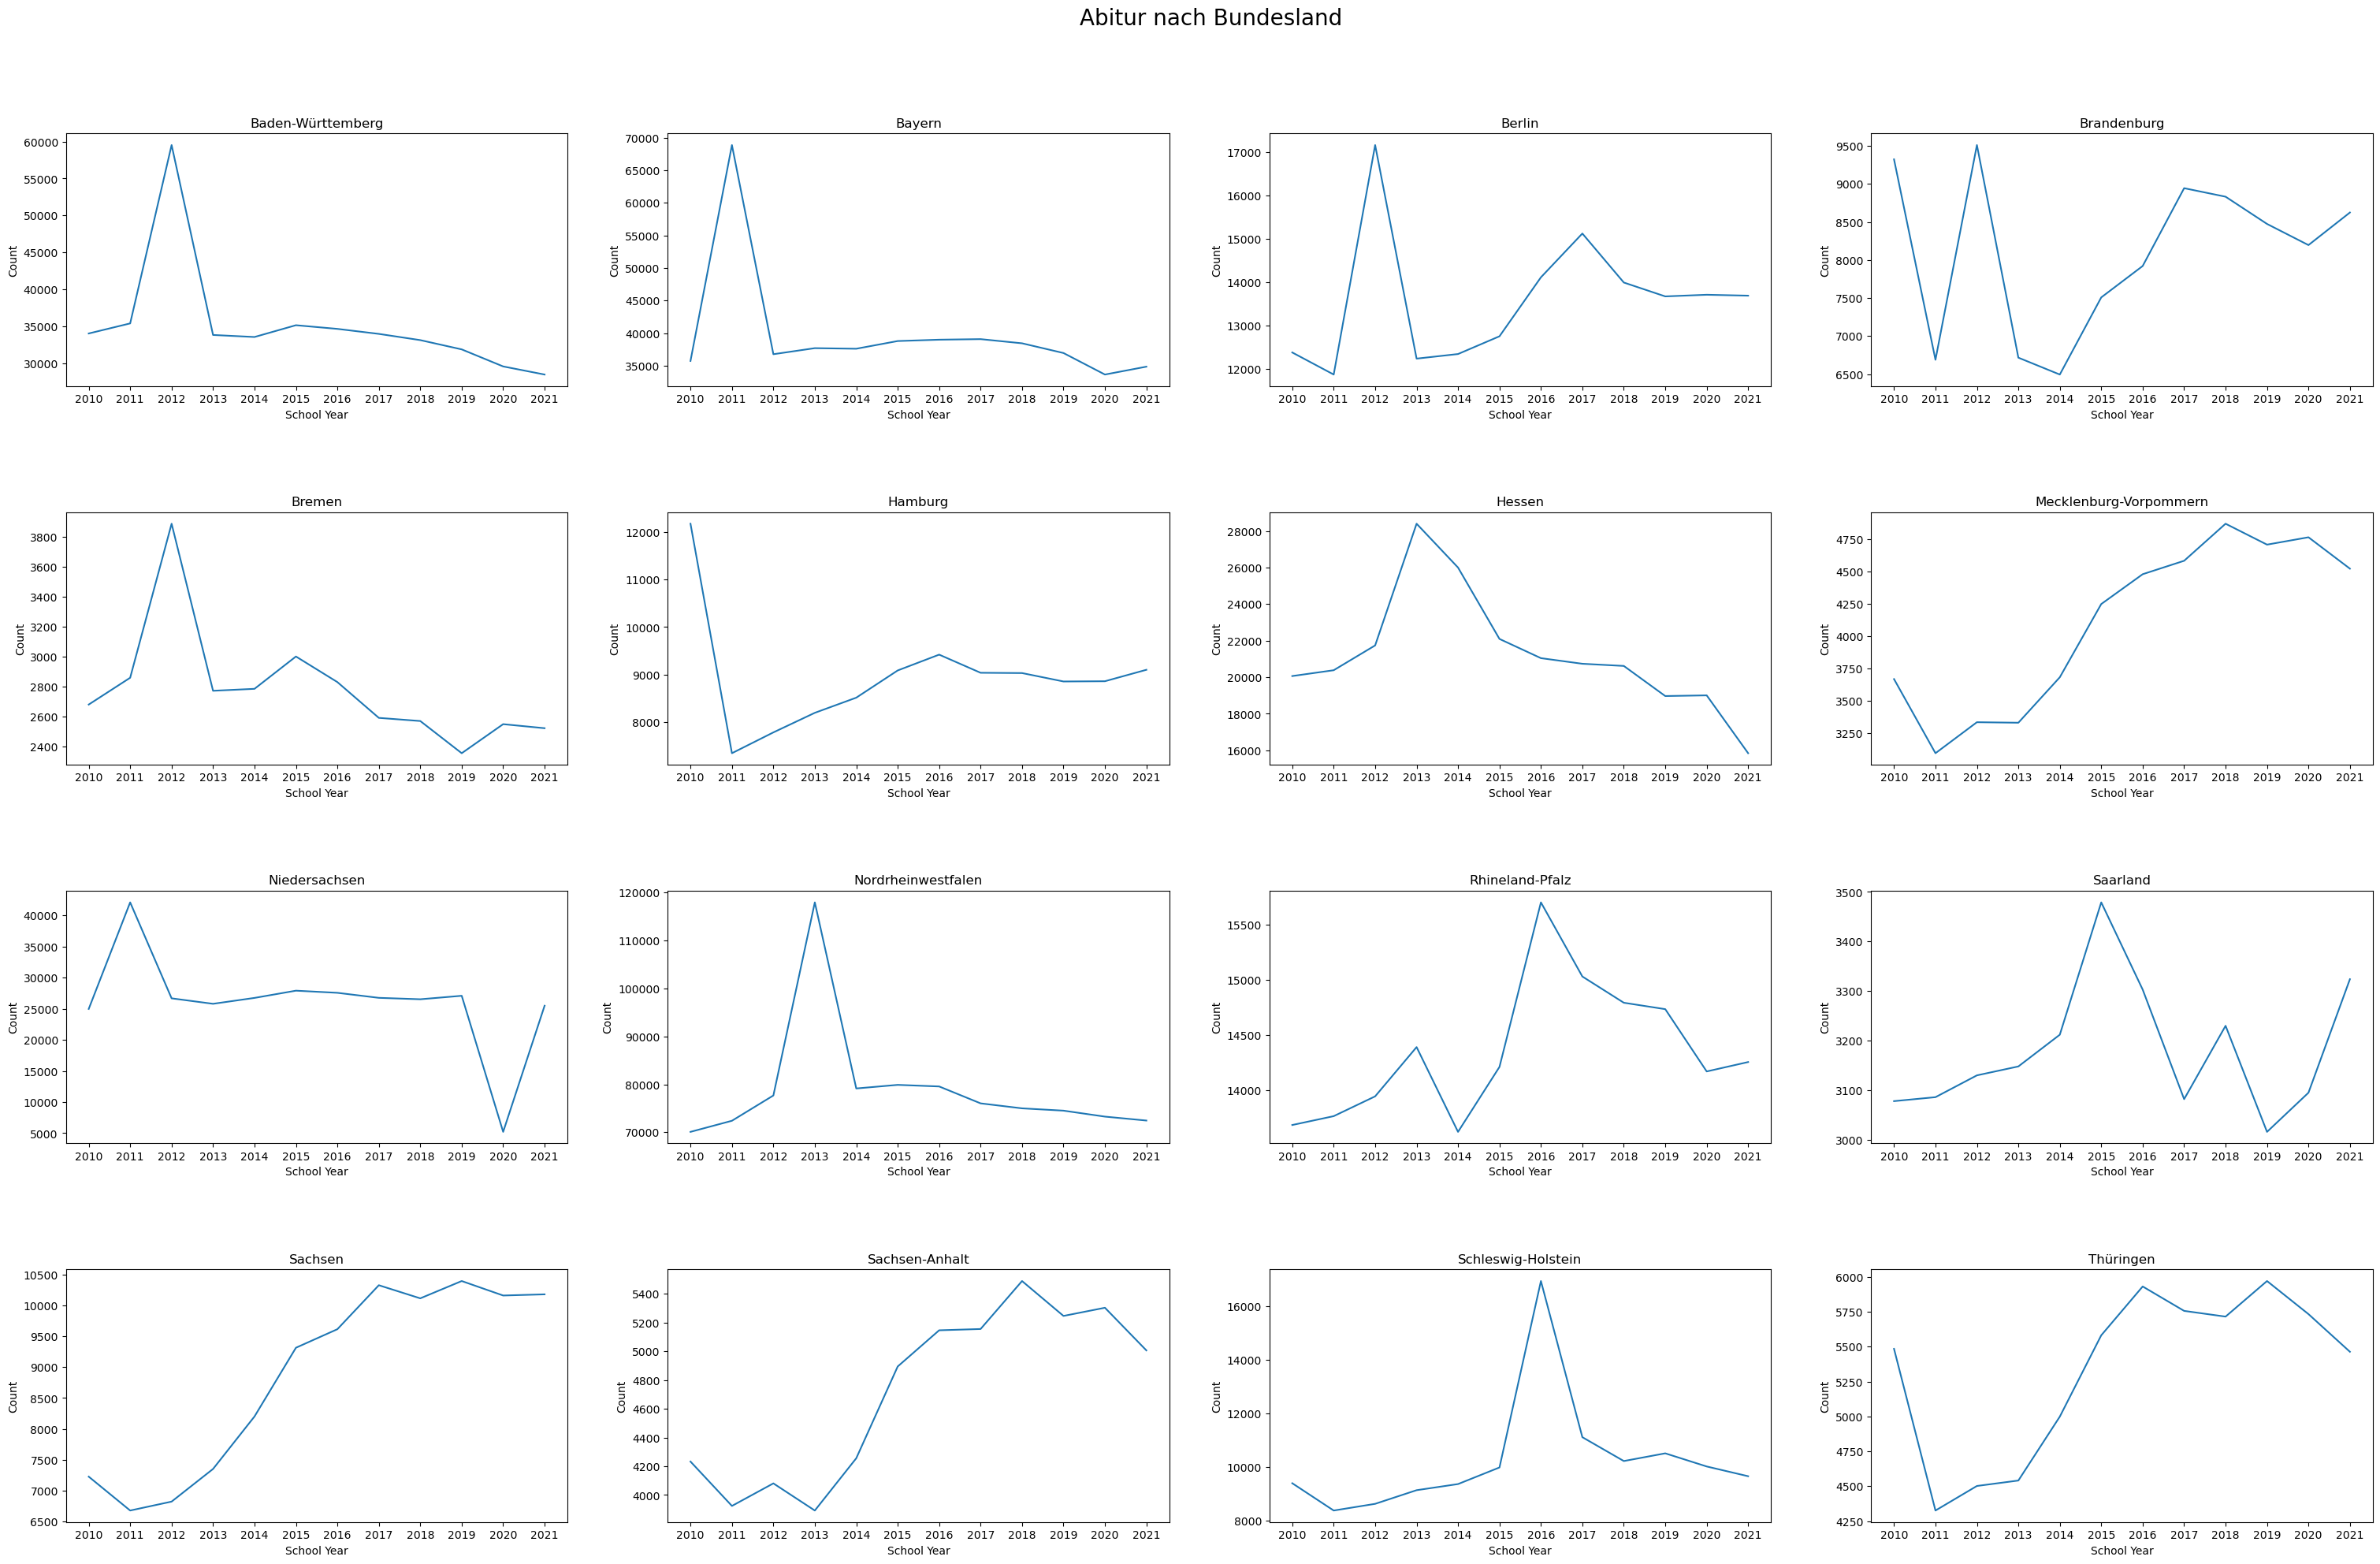

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(4, 4, figsize=(30,20)) # create subplots on 2 rows and 3 columns
plt.suptitle('Abitur nach Bundesland', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

datasets = [    {"state": "Baden-Württemberg", "data": bw_abitur},    
                {"state": "Bayern", "data": bay_abitur},    
                {"state": "Berlin", "data": ber_abitur},    
                {"state": "Brandenburg", "data": bra_abitur},    
                {"state": "Bremen", "data": bre_abitur},    
                {"state": "Hamburg", "data": hh_abitur},    
                {"state": "Hessen", "data": he_abitur},    
                {"state": "Mecklenburg-Vorpommern", "data": mvp_abitur},    
                {"state": "Niedersachsen", "data": ni_abitur},    
                {"state": "Nordrheinwestfalen", "data": nrw_abitur},    
                {"state": "Rhineland-Pfalz", "data": rp_abitur},    
                {"state": "Saarland", "data": saar_abitur},    
                {"state": "Sachsen", "data": sachs_abitur},    
                {"state": "Sachsen-Anhalt", "data": sachs_an_abitur},    
                {"state": "Schleswig-Holstein", "data": sh_abitur},    
                {"state": "Thüringen", "data": thue_abitur},]


for i, dataset in enumerate(datasets):
    row = i // 4
    col = i % 4
    
    axs[row, col].plot(dataset["data"])
    axs[row, col].set_title(dataset["state"])
    axs[row, col].set_xlabel("School Year")
    axs[row, col].set_ylabel("Count")
    axs[row, col].tick_params(axis='x', rotation=0)

plt.show()

## Berechnung der Gesamtzahl (Abitur) für Deutschland

In [28]:
# Concatenate all 16 dataframes

df_abitur_merged = pd.concat([bw_abitur,bay_abitur,ber_abitur,bra_abitur,bre_abitur,hh_abitur,he_abitur,mvp_abitur,ni_abitur,nrw_abitur,rp_abitur,saar_abitur,sachs_abitur,sachs_an_abitur,sh_abitur,thue_abitur],axis=1)


,4,10,16,22,28,34,40,46,52,58,64,70,76,82,88,94
2010,34009,35719,12372,9324,2681,12176,20065,3667,24973,70102,13688,3078,7224,4233,9398,5485
2011,35374,68880,11863,6689,2860,7345,20384,3093,42105,72413,13768,3086,6674,3924,8382,4326
2012,59538,36755,17155,9512,3889,7783,21742,3333,26676,77679,13947,3130,6819,4081,8631,4502
2013,33808,37684,12230,6717,2773,8195,28404,3329,25797,117895,14392,3148,7349,3892,9139,4541
2014,33531,37596,12336,6495,2786,8514,26004,3681,26745,79141,13626,3212,8201,4256,9367,4999
2015,35128,38777,12745,7509,3002,9087,22097,4248,27909,79889,14213,3479,9317,4895,9985,5582
2016,34631,38985,14105,7922,2831,9420,21045,4479,27564,79560,15700,3303,9618,5147,16925,5932
2017,33953,39071,15115,8945,2592,9038,20738,4583,26756,76038,15030,3082,10332,5156,11112,5757
2018,33109,38431,13985,8833,2571,9032,20619,4870,26528,75001,14793,3230,10119,5490,10224,5716
2019,31853,36937,13665,8475,2356,8855,18971,4708,27087,74520,14735,3016,10400,5247,10511,5971


In [44]:
# calculate new columns with sum

df_abitur_merged['BRD'] = df_abitur_merged[4] + df_abitur_merged[10] + df_abitur_merged[16] + df_abitur_merged[22] + df_abitur_merged[28] + df_abitur_merged[34] + df_abitur_merged[40] + df_abitur_merged[46] + df_abitur_merged[52] + df_abitur_merged[58] + df_abitur_merged[64] + df_abitur_merged[70] + df_abitur_merged[76] + df_abitur_merged[82] + df_abitur_merged[88] + df_abitur_merged[94]


,4,10,16,22,28,34,40,46,52,58,64,70,76,82,88,94,BRD
2010,34009,35719,12372,9324,2681,12176,20065,3667,24973,70102,13688,3078,7224,4233,9398,5485,268194
2011,35374,68880,11863,6689,2860,7345,20384,3093,42105,72413,13768,3086,6674,3924,8382,4326,311166
2012,59538,36755,17155,9512,3889,7783,21742,3333,26676,77679,13947,3130,6819,4081,8631,4502,305172
2013,33808,37684,12230,6717,2773,8195,28404,3329,25797,117895,14392,3148,7349,3892,9139,4541,319293
2014,33531,37596,12336,6495,2786,8514,26004,3681,26745,79141,13626,3212,8201,4256,9367,4999,280490


In [47]:
# Reducing dataframe to BRD-only

df_abitur_brd = df_abitur_merged['BRD']


,BRD
2010,268194
2011,311166
2012,305172
2013,319293
2014,280490


## Visualizing BRD

/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_1558/3959122008.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


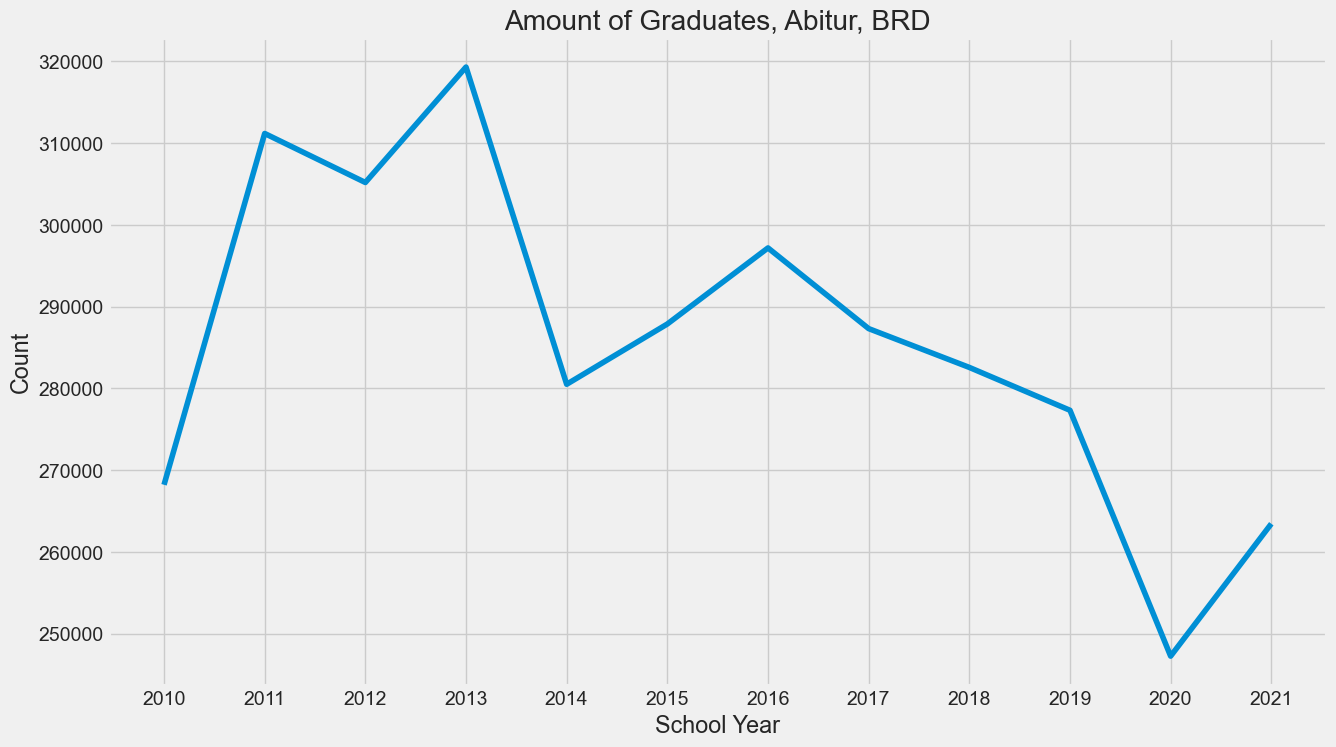

In [52]:
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')

plt.plot(df_abitur_brd)

plt.title("Amount of Graduates, Abitur, BRD")
plt.xlabel("School Year")
plt.ylabel('Count')
plt.tick_params(axis='x', rotation=0)
plt.show()

## Dropouts nach Bundesländern

In [13]:
# Dropouts nach BL

bw_dropouts = df_insgesamt.iloc[0,2:14]
bay_dropouts = df_insgesamt.iloc[6, 2:14]
ber_dropouts = df_insgesamt.iloc[12, 2:14]
bra_dropouts = df_insgesamt.iloc[18, 2:14]
bre_dropouts = df_insgesamt.iloc[24, 2:14]
hh_dropouts = df_insgesamt.iloc[30, 2:14]
he_dropouts = df_insgesamt.iloc[36, 2:14]
mvp_dropouts = df_insgesamt.iloc[42, 2:14]
ni_dropouts = df_insgesamt.iloc[48, 2:14]
nrw_dropouts = df_insgesamt.iloc[54, 2:14]
rp_dropouts = df_insgesamt.iloc[60, 2:14]
saar_dropouts = df_insgesamt.iloc[66, 2:14]
sachs_dropouts = df_insgesamt.iloc[72, 2:14]
sachs_an_dropouts = df_insgesamt.iloc[78, 2:14]
sh_dropouts = df_insgesamt.iloc[84, 2:14]
thue_dropouts = df_insgesamt.iloc[90, 2:14]

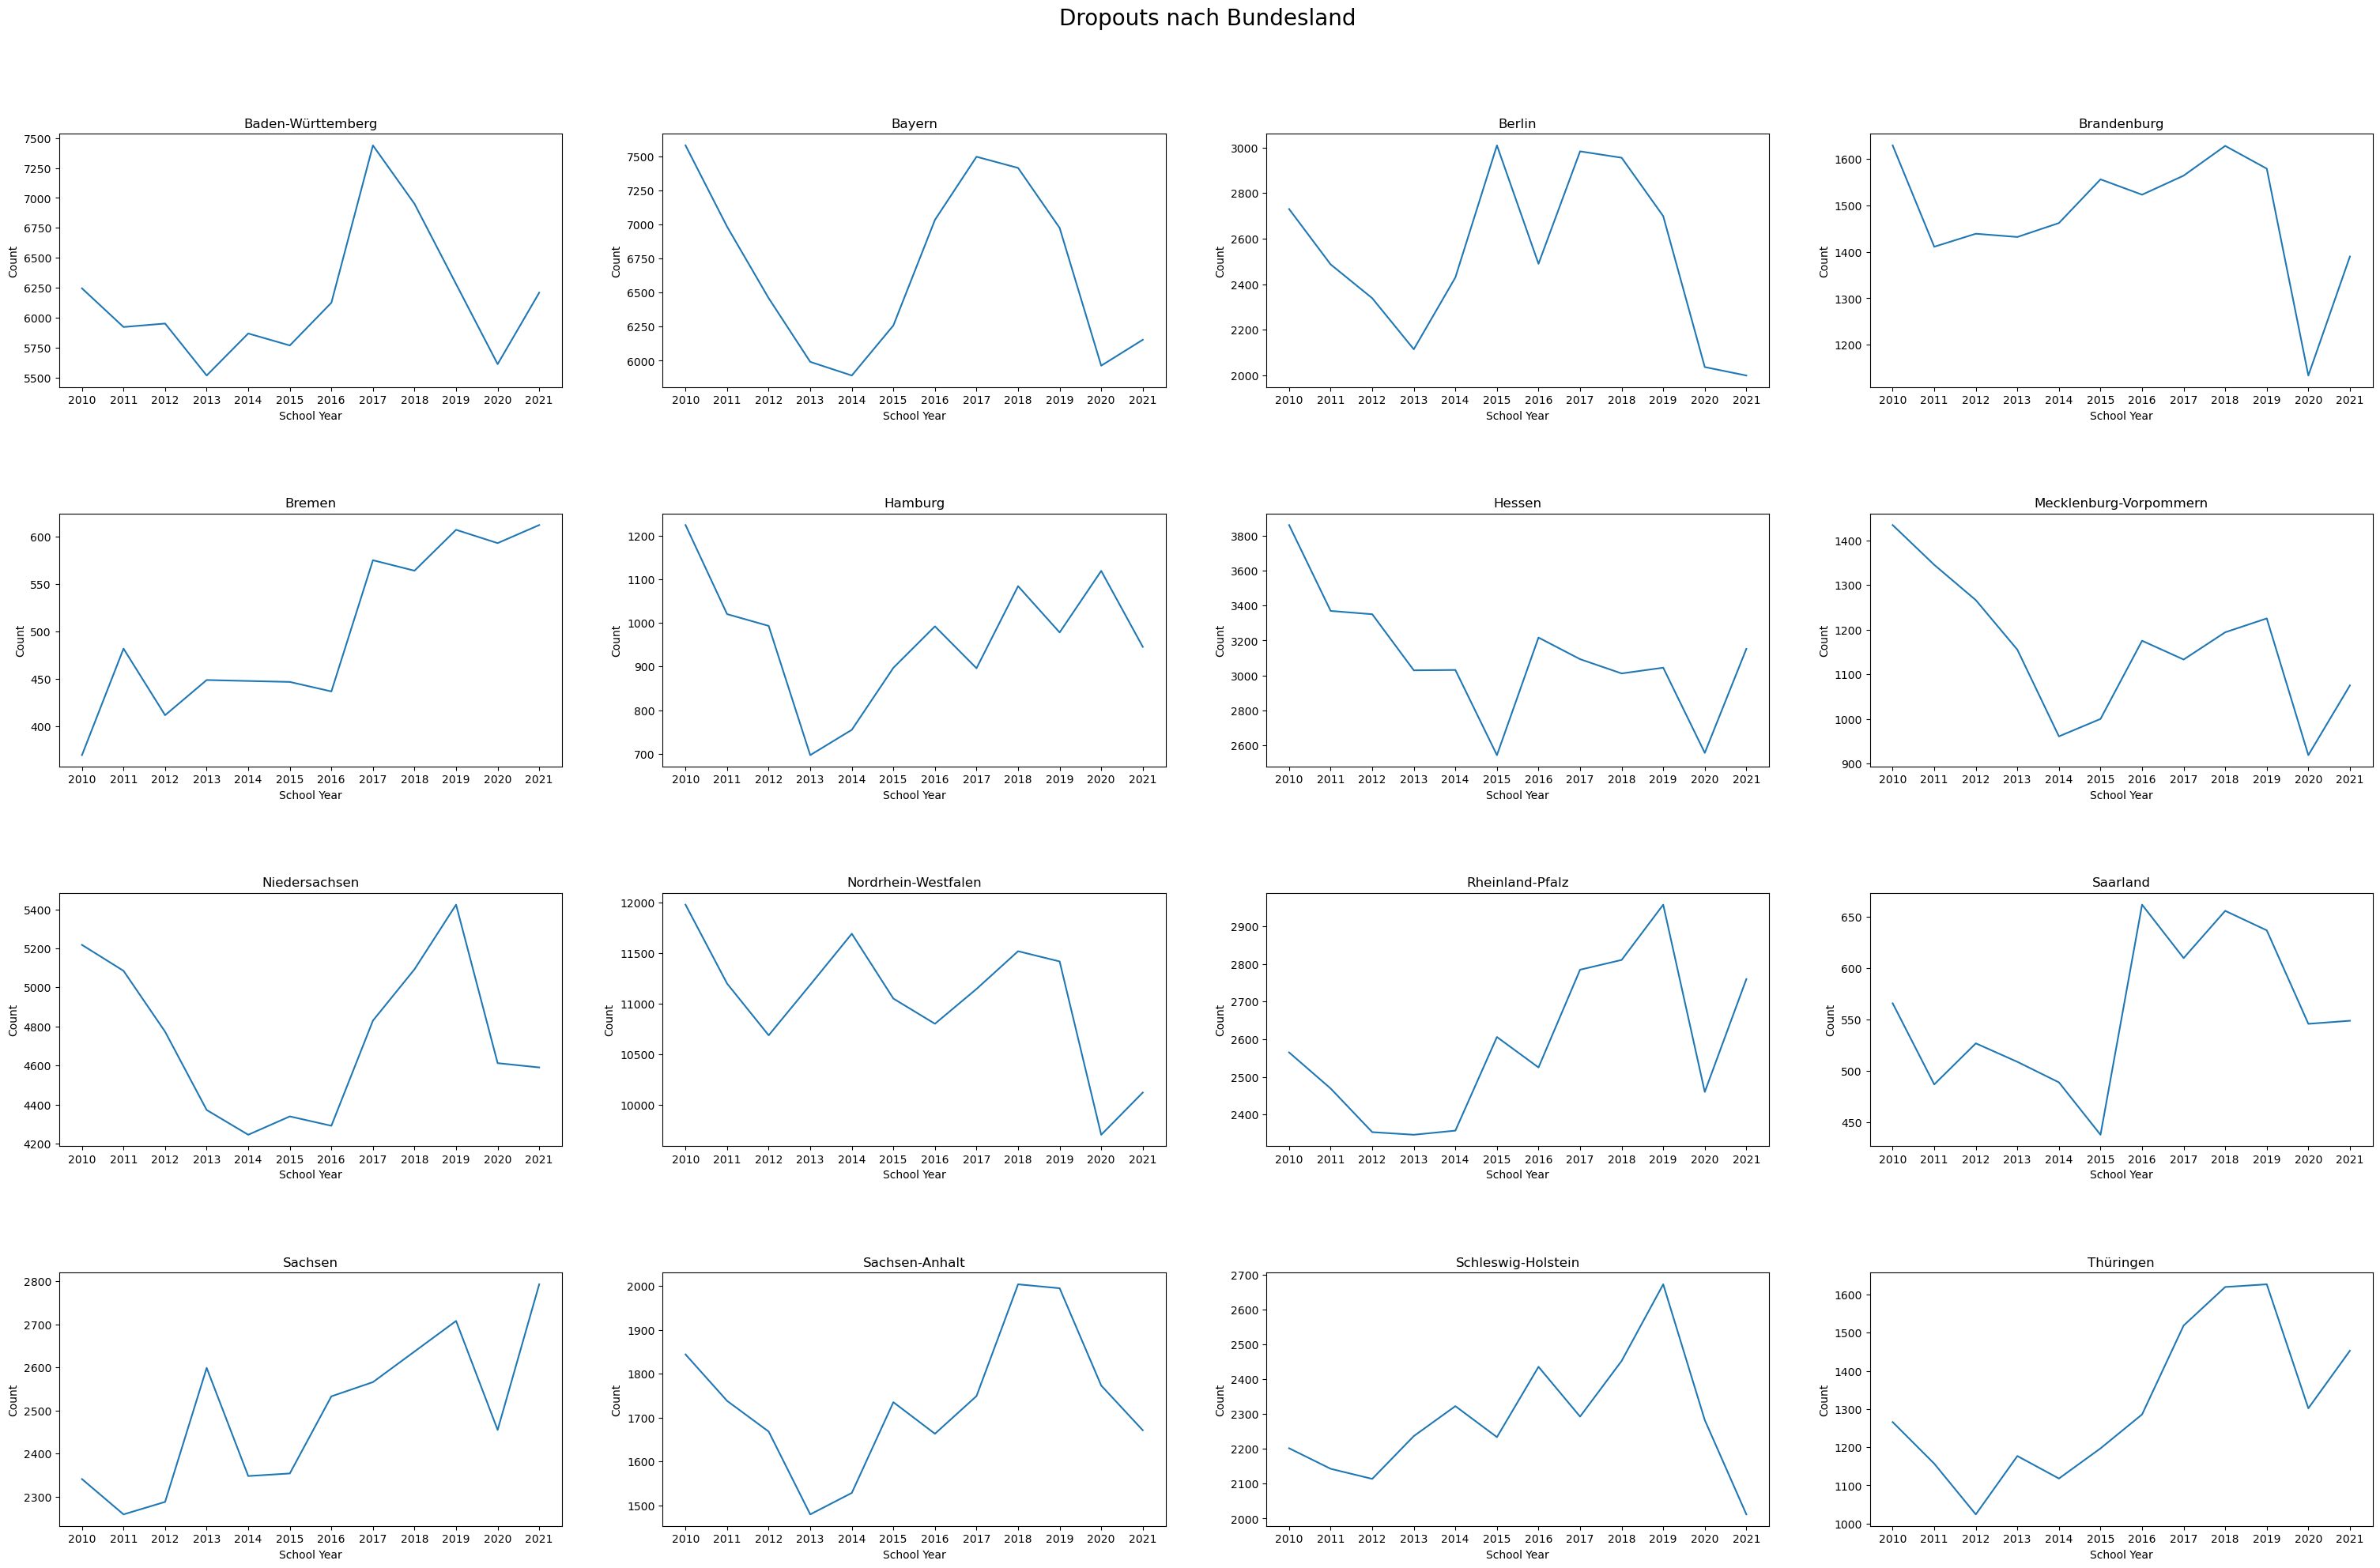

In [15]:
fig, axs = plt.subplots(4, 4, figsize=(30,20)) # create subplots on 2 rows and 3 columns
plt.suptitle('Dropouts nach Bundesland', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

datasets = [    {"state": "Baden-Württemberg", "data": bw_dropouts},    
                {"state": "Bayern", "data": bay_dropouts},    
                {"state": "Berlin", "data": ber_dropouts},    
                {"state": "Brandenburg", "data": bra_dropouts},    
                {"state": "Bremen", "data": bre_dropouts},    
                {"state": "Hamburg", "data": hh_dropouts},    
                {"state": "Hessen", "data": he_dropouts},    
                {"state": "Mecklenburg-Vorpommern", "data": mvp_dropouts},    
                {"state": "Niedersachsen", "data": ni_dropouts},    
                {"state": "Nordrhein-Westfalen", "data": nrw_dropouts},    
                {"state": "Rheinland-Pfalz", "data": rp_dropouts},    
                {"state": "Saarland", "data": saar_dropouts},    
                {"state": "Sachsen", "data": sachs_dropouts},    
                {"state": "Sachsen-Anhalt", "data": sachs_an_dropouts},    
                {"state": "Schleswig-Holstein", "data": sh_dropouts},    
                {"state": "Thüringen", "data": thue_dropouts},]


for i, dataset in enumerate(datasets):
    row = i // 4
    col = i % 4
    
    axs[row, col].plot(dataset["data"])
    axs[row, col].set_title(dataset["state"])
    axs[row, col].set_xlabel("School Year")
    axs[row, col].set_ylabel("Count")
    axs[row, col].tick_params(axis='x', rotation=0)

plt.show()

## Berechnung der Gesamtzahl (Dropouts) für Deutschland

In [54]:
# Concatenate all 16 dataframes

df_dropouts_merged = pd.concat([bw_dropouts,bay_dropouts,ber_dropouts,bra_dropouts,bre_dropouts,hh_dropouts,he_dropouts,mvp_dropouts,ni_dropouts,nrw_dropouts,rp_dropouts,saar_dropouts,sachs_dropouts,sachs_an_dropouts,sh_dropouts,thue_dropouts],axis=1)
df_dropouts_merged.head()

,0,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90
2010,6245,7579,2730,1629,370,1224,3863,1434,5218,11982,2565,566,2341,1844,2202,1266
2011,5922,6983,2487,1411,482,1020,3370,1345,5085,11202,2469,487,2259,1738,2143,1157
2012,5951,6459,2339,1439,412,993,3351,1266,4773,10691,2353,527,2288,1668,2114,1024
2013,5517,5992,2115,1432,449,697,3029,1155,4372,11190,2346,509,2599,1479,2237,1177
2014,5868,5892,2430,1462,448,755,3031,961,4245,11695,2357,489,2348,1528,2323,1118


In [60]:
# calculate new columns with sum

df_dropouts_merged['BRD'] = df_dropouts_merged[0] + df_dropouts_merged[6] + df_dropouts_merged[12] + df_dropouts_merged[18] + df_dropouts_merged[24] + df_dropouts_merged[30] + df_dropouts_merged[36] + df_dropouts_merged[42] + df_dropouts_merged[48] + df_dropouts_merged[54] + df_dropouts_merged[60] + df_dropouts_merged[66] + df_dropouts_merged[72] + df_dropouts_merged[78] + df_dropouts_merged[84] + df_dropouts_merged[90]
df_dropouts_merged.head(14)

,0,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90,BRD
2010,6245,7579,2730,1629,370,1224,3863,1434,5218,11982,2565,566,2341,1844,2202,1266,53058
2011,5922,6983,2487,1411,482,1020,3370,1345,5085,11202,2469,487,2259,1738,2143,1157,49560
2012,5951,6459,2339,1439,412,993,3351,1266,4773,10691,2353,527,2288,1668,2114,1024,47648
2013,5517,5992,2115,1432,449,697,3029,1155,4372,11190,2346,509,2599,1479,2237,1177,46295
2014,5868,5892,2430,1462,448,755,3031,961,4245,11695,2357,489,2348,1528,2323,1118,46950
2015,5768,6259,3009,1556,447,897,2542,1000,4339,11054,2606,438,2354,1735,2234,1197,47435
2016,6125,7033,2490,1523,437,992,3217,1175,4291,10805,2525,662,2533,1663,2436,1286,49193
2017,7439,7496,2983,1564,575,896,3093,1133,4830,11149,2785,610,2566,1749,2293,1519,52680
2018,6951,7414,2955,1628,564,1084,3011,1194,5093,11522,2811,656,2637,2004,2453,1620,53597
2019,6281,6974,2699,1579,607,978,3044,1225,5424,11421,2958,637,2708,1995,2673,1627,52830


In [56]:
# Reducing dataframe to BRD-only

df_dropouts_brd = df_dropouts_merged['BRD']


## Visualizing BRD

/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_1558/3221599978.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


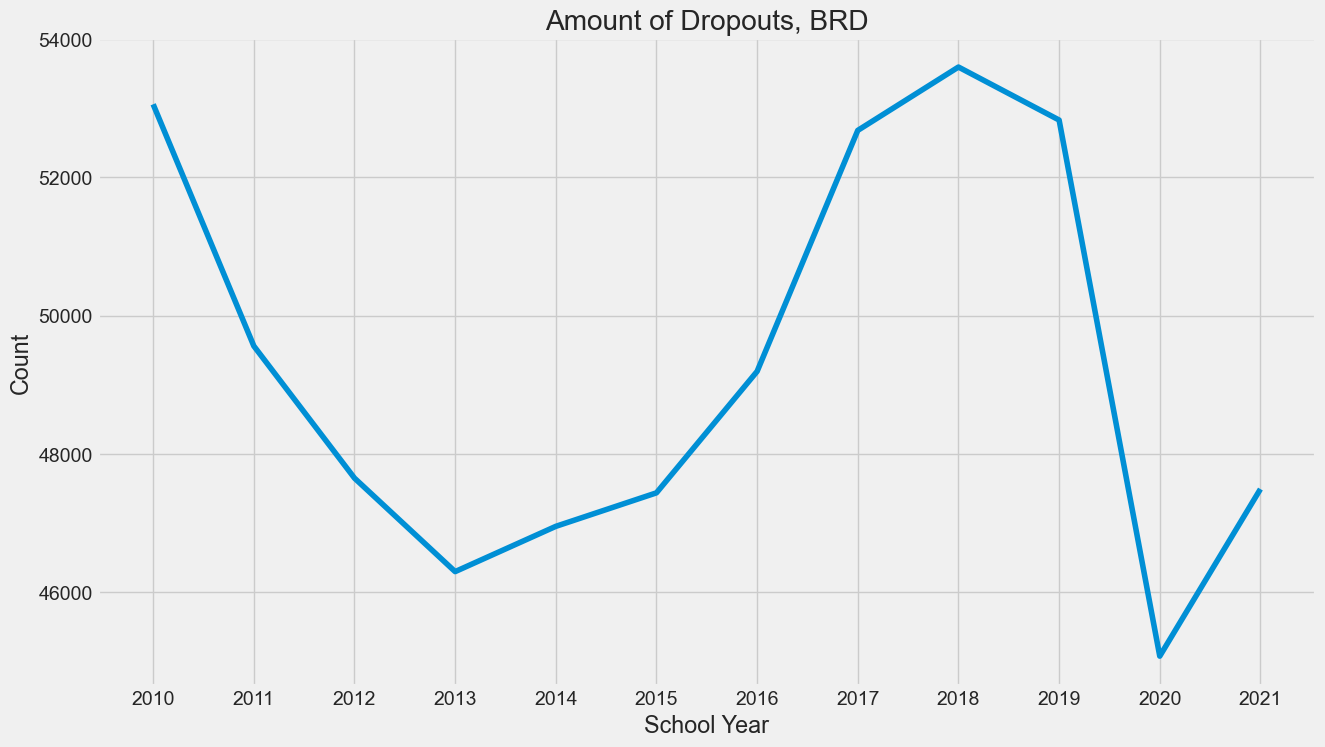

In [58]:
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')

plt.plot(df_dropouts_brd)

plt.title("Amount of Dropouts, BRD")
plt.xlabel("School Year")
plt.ylabel('Count')
plt.tick_params(axis='x', rotation=0)
plt.show()

# Gesamtschülerzahl nach Bundesländern

In [62]:
bw_gesamt = df_insgesamt.iloc[5,2:14]
bay_gesamt = df_insgesamt.iloc[11, 2:14]
ber_gesamt = df_insgesamt.iloc[17, 2:14]
bra_gesamt = df_insgesamt.iloc[23, 2:14]
bre_gesamt = df_insgesamt.iloc[29, 2:14]
hh_gesamt = df_insgesamt.iloc[35, 2:14]
he_gesamt = df_insgesamt.iloc[41, 2:14]
mvp_gesamt = df_insgesamt.iloc[47, 2:14]
ni_gesamt = df_insgesamt.iloc[53, 2:14]
nrw_gesamt = df_insgesamt.iloc[59, 2:14]
rp_gesamt = df_insgesamt.iloc[65, 2:14]
saar_gesamt = df_insgesamt.iloc[71, 2:14]
sachs_gesamt = df_insgesamt.iloc[77, 2:14]
sachs_an_gesamt = df_insgesamt.iloc[83, 2:14]
sh_gesamt = df_insgesamt.iloc[89, 2:14]
thue_gesamt = df_insgesamt.iloc[95, 2:14]

### Relative Häufigkeit Abitur nach Bundesländern

In [79]:
bw_abitur_relativ = pd.concat([bw_abitur,bw_gesamt],axis=1)

bay_abitur_relativ = pd.concat([bay_abitur,bay_gesamt],axis=1)
ber_abitur_relativ = pd.concat([ber_abitur,ber_gesamt],axis=1)
bra_abitur_relativ = pd.concat([bra_abitur,bra_gesamt],axis=1)
bre_abitur_relativ = pd.concat([bre_abitur,bre_gesamt],axis=1)
hh_abitur_relativ = pd.concat([hh_abitur,hh_gesamt],axis=1)
he_abitur_relativ = pd.concat([he_abitur,he_gesamt],axis=1)
mvp_abitur_relativ = pd.concat([mvp_abitur,mvp_gesamt],axis=1)
ni_abitur_relativ = pd.concat([ni_abitur,ni_gesamt],axis=1)
nrw_abitur_relativ = pd.concat([nrw_abitur,nrw_gesamt],axis=1)
rp_abitur_relativ = pd.concat([rp_abitur,rp_gesamt],axis=1)
saar_abitur_relativ = pd.concat([saar_abitur,saar_gesamt],axis=1)
sachs_abitur_relativ = pd.concat([sachs_abitur,sachs_gesamt],axis=1)
sachs_an_abitur_relativ = pd.concat([sachs_an_abitur,sachs_an_gesamt],axis=1)
sh_abitur_relativ = pd.concat([sh_abitur,sh_gesamt],axis=1)
thue_abitur_relativ = pd.concat([thue_abitur,thue_gesamt],axis=1)

In [96]:
# Neue Spalte mit Prozent

bw_abitur_relativ['bw_Relation'] = bw_abitur_relativ[4] / bw_abitur_relativ[5] * 100
bay_abitur_relativ['bay_Relation'] = bay_abitur_relativ[10] / bay_abitur_relativ[11] * 100
ber_abitur_relativ['ber_Relation'] = ber_abitur_relativ[16] / ber_abitur_relativ[17] * 100
bra_abitur_relativ['bra_Relation'] = bra_abitur_relativ[22] / bra_abitur_relativ[23] * 100
bre_abitur_relativ['bre_Relation'] = bre_abitur_relativ[28] / bre_abitur_relativ[29] * 100
hh_abitur_relativ['hh_Relation'] = hh_abitur_relativ[34] / hh_abitur_relativ[35] * 100
he_abitur_relativ['he_Relation'] = he_abitur_relativ[40] / he_abitur_relativ[41] * 100
mvp_abitur_relativ['mvp_Relation'] = mvp_abitur_relativ[46] / mvp_abitur_relativ[47] * 100
ni_abitur_relativ['ni_Relation'] = ni_abitur_relativ[52] / ni_abitur_relativ[53] * 100
nrw_abitur_relativ['nrw_Relation'] = nrw_abitur_relativ[58] / nrw_abitur_relativ[59] * 100
rp_abitur_relativ['rp_Relation'] = rp_abitur_relativ[64] / rp_abitur_relativ[65] * 100
saar_abitur_relativ['saar_Relation'] = saar_abitur_relativ[70] / saar_abitur_relativ[71] * 100
sachs_abitur_relativ['sachs_Relation'] = sachs_abitur_relativ[76] / sachs_abitur_relativ[77] * 100
sachs_an_abitur_relativ['sachs_an_Relation'] = sachs_an_abitur_relativ[82] / sachs_an_abitur_relativ[83] * 100
sh_abitur_relativ['sh_Relation'] = sh_abitur_relativ[88] / sh_abitur_relativ[89] * 100
thue_abitur_relativ['thue_Relation'] = thue_abitur_relativ[94] / thue_abitur_relativ[95] * 100



In [97]:
# Reducing dataframe to Relativ-only

bw_abitur_relativ_only = bw_abitur_relativ['bw_Relation']
bay_abitur_relativ_only = bay_abitur_relativ['bay_Relation']
ber_abitur_relativ_only = ber_abitur_relativ['ber_Relation']
bra_abitur_relativ_only = bra_abitur_relativ['bra_Relation']
bre_abitur_relativ_only = bre_abitur_relativ['bre_Relation']
hh_abitur_relativ_only = hh_abitur_relativ['hh_Relation']
he_abitur_relativ_only = he_abitur_relativ['he_Relation']
mvp_abitur_relativ_only = mvp_abitur_relativ['mvp_Relation']
ni_abitur_relativ_only = ni_abitur_relativ['ni_Relation']
nrw_abitur_relativ_only = nrw_abitur_relativ['nrw_Relation']
rp_abitur_relativ_only = rp_abitur_relativ['rp_Relation']
saar_abitur_relativ_only = saar_abitur_relativ['saar_Relation']
sachs_abitur_relativ_only = sachs_abitur_relativ['sachs_Relation']
sachs_an_abitur_relativ_only = sachs_an_abitur_relativ['sachs_an_Relation']
sh_abitur_relativ_only = sh_abitur_relativ['sh_Relation']
thue_abitur_relativ_only = thue_abitur_relativ['thue_Relation']



In [98]:
# zusammenfügen

df_abitur_relativ_merged = pd.concat([bw_abitur_relativ_only,
                                      bay_abitur_relativ_only,
                                      ber_abitur_relativ_only,bra_abitur_relativ_only,bre_abitur_relativ_only,hh_abitur_relativ_only,he_abitur_relativ_only,mvp_abitur_relativ_only,ni_abitur_relativ_only,nrw_abitur_relativ_only,rp_abitur_relativ_only,saar_abitur_relativ_only,sachs_abitur_relativ_only,sachs_an_abitur_relativ_only,sh_abitur_relativ_only,thue_abitur_relativ_only],axis=1)
df_abitur_relativ_merged.head(14)

,bw_Relation,bay_Relation,ber_Relation,bra_Relation,bre_Relation,hh_Relation,he_Relation,mvp_Relation,ni_Relation,nrw_Relation,rp_Relation,saar_Relation,sachs_Relation,sachs_an_Relation,sh_Relation,thue_Relation
2010,27.713583,25.74565,39.805669,46.540881,34.881603,59.012262,29.482206,33.80035,28.590891,32.434208,30.450258,30.697118,29.905614,26.865956,29.235364,36.561792
2011,29.079699,40.469797,40.074995,40.502573,36.024688,50.606311,30.898893,32.363712,40.970127,34.649524,31.005517,31.541292,29.083145,26.827101,27.903725,32.259508
2012,42.579455,26.651633,48.668047,46.815631,44.314038,51.769323,32.719338,32.156295,30.508823,36.739298,31.38742,31.403632,28.755166,27.319588,29.455327,33.017968
2013,27.976333,27.476486,40.230263,37.277318,36.419753,57.894737,38.180498,31.545532,29.833813,46.189861,32.082748,31.054553,28.203554,26.668494,30.489758,30.529784
2014,28.036891,27.512825,41.102189,35.682892,36.979028,54.615434,36.947997,33.285107,30.633984,37.492835,31.139449,33.045267,29.405859,27.035955,30.93461,31.396809
2015,29.094885,28.437851,40.666879,36.010934,38.193384,54.711301,35.260983,35.36758,32.525698,38.573967,32.982155,36.838204,32.278963,29.017725,33.137528,33.695521
2016,29.075781,27.815434,45.451616,37.71483,40.48913,55.594901,32.276617,35.652312,32.749955,39.181888,36.316532,34.579146,31.410843,29.164778,45.502205,34.599008
2017,29.989842,28.71242,46.580788,41.87146,37.081545,52.712003,32.521524,35.76836,32.449215,38.551981,35.64906,33.44184,32.839616,29.337127,36.514196,32.989513
2018,30.513801,28.638603,45.26769,40.693817,35.97817,52.344248,33.265573,35.97016,32.722742,39.64154,35.413674,34.877443,32.920164,30.348259,34.937124,32.560524
2019,29.942658,28.457953,43.635841,40.080397,36.035485,53.423831,31.598847,35.247436,33.78316,39.396054,36.57689,34.056007,32.780685,28.942578,36.152576,32.690939


### Speichern als CSV

In [110]:
df_abitur_relativ_merged.to_csv("abitur_graduates_percentage_all_states", encoding='utf-8')

## Visualisierung

/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_1558/2317589196.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


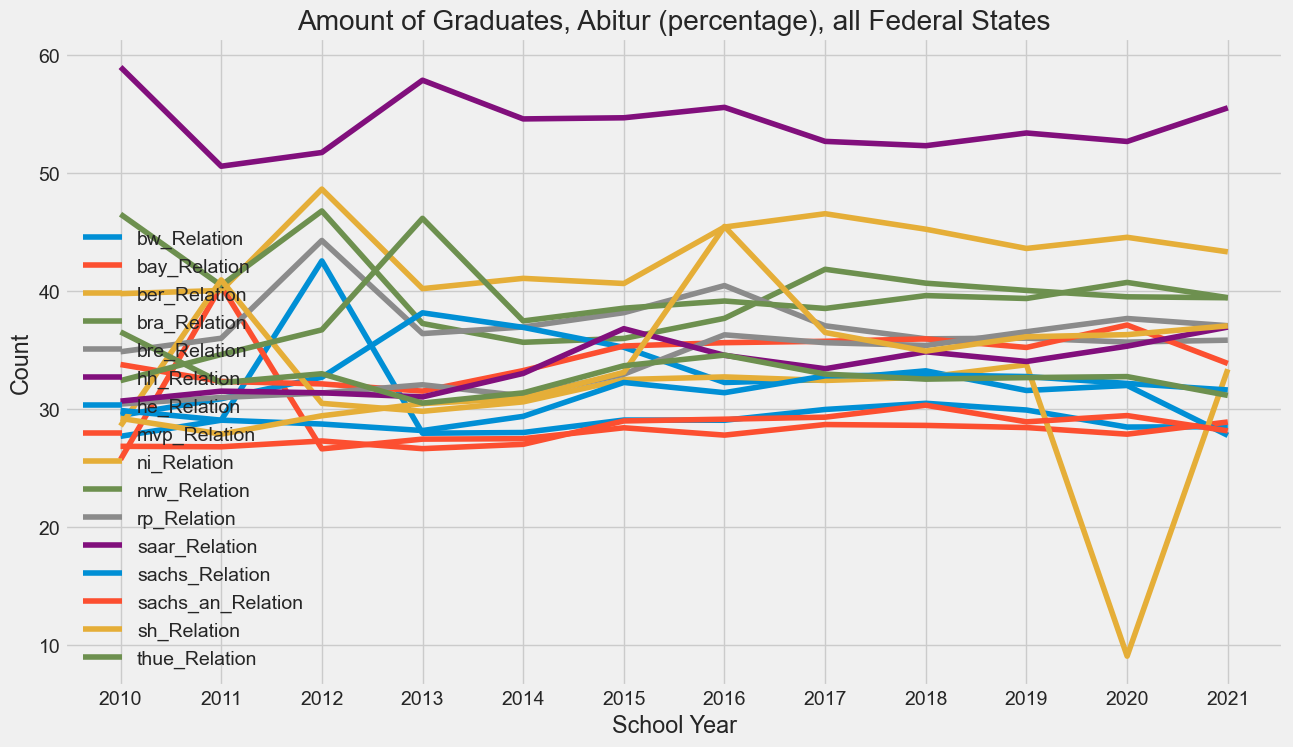

In [102]:
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')

plt.plot(df_abitur_relativ_merged)

plt.title("Amount of Graduates, Abitur (percentage), all Federal States")
plt.legend(df_abitur_relativ_merged)
plt.xlabel("School Year")
plt.ylabel('Count')
plt.tick_params(axis='x', rotation=0)
plt.show()

Which Bundesland is the best to go to school?

- According to the above graph, Hamburg has by far the highest percentage of A-level Graduates compared to the overall number of students.

/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_1558/3812684618.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


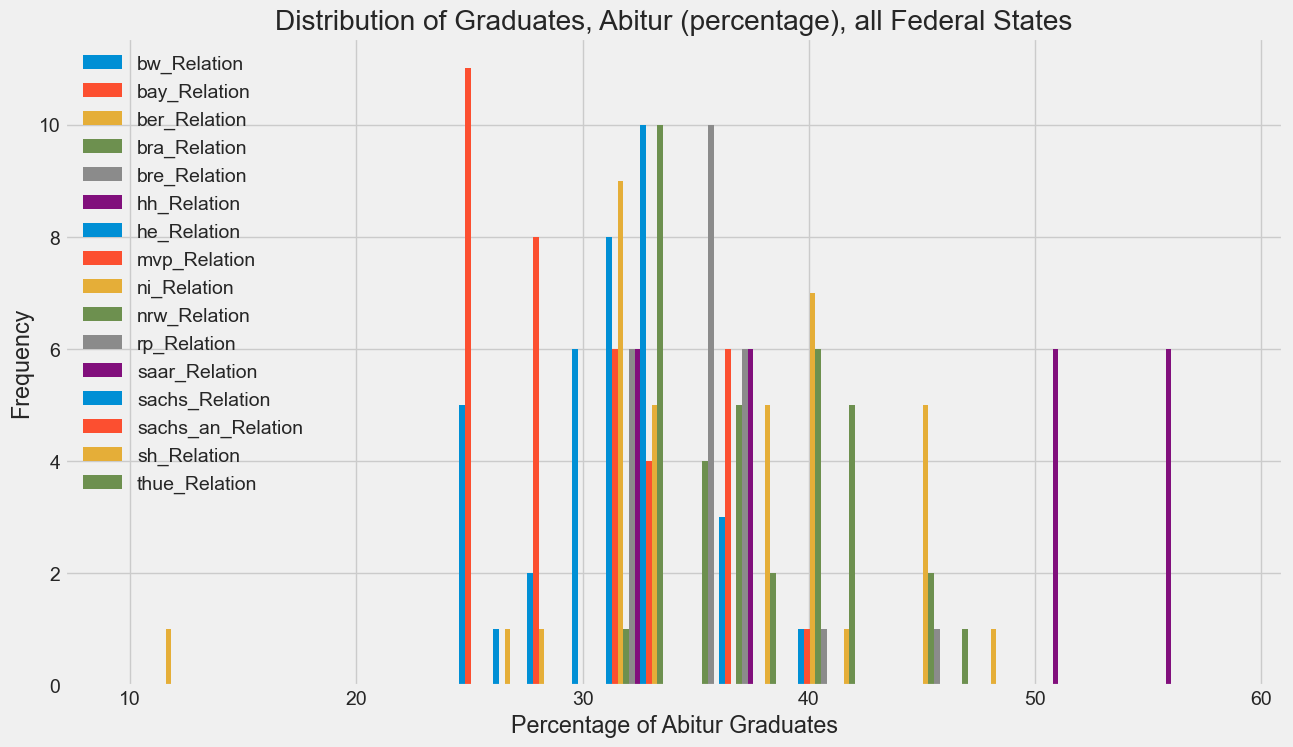

In [104]:
# create a figure with a size of 14x8 inches
plt.figure(figsize=(14, 8))

# set the style of the plot
plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')

# plot a histogram of the merged data
plt.hist(df_abitur_relativ_merged)

# add a title and axis labels
plt.title("Distribution of Graduates, Abitur (percentage), all Federal States")
plt.legend(df_abitur_relativ_merged)
plt.xlabel("Percentage of Abitur Graduates")
plt.ylabel('Frequency')

# show the plot
plt.show()

## Nochmal jedes Bundesland einzeln geplottet.

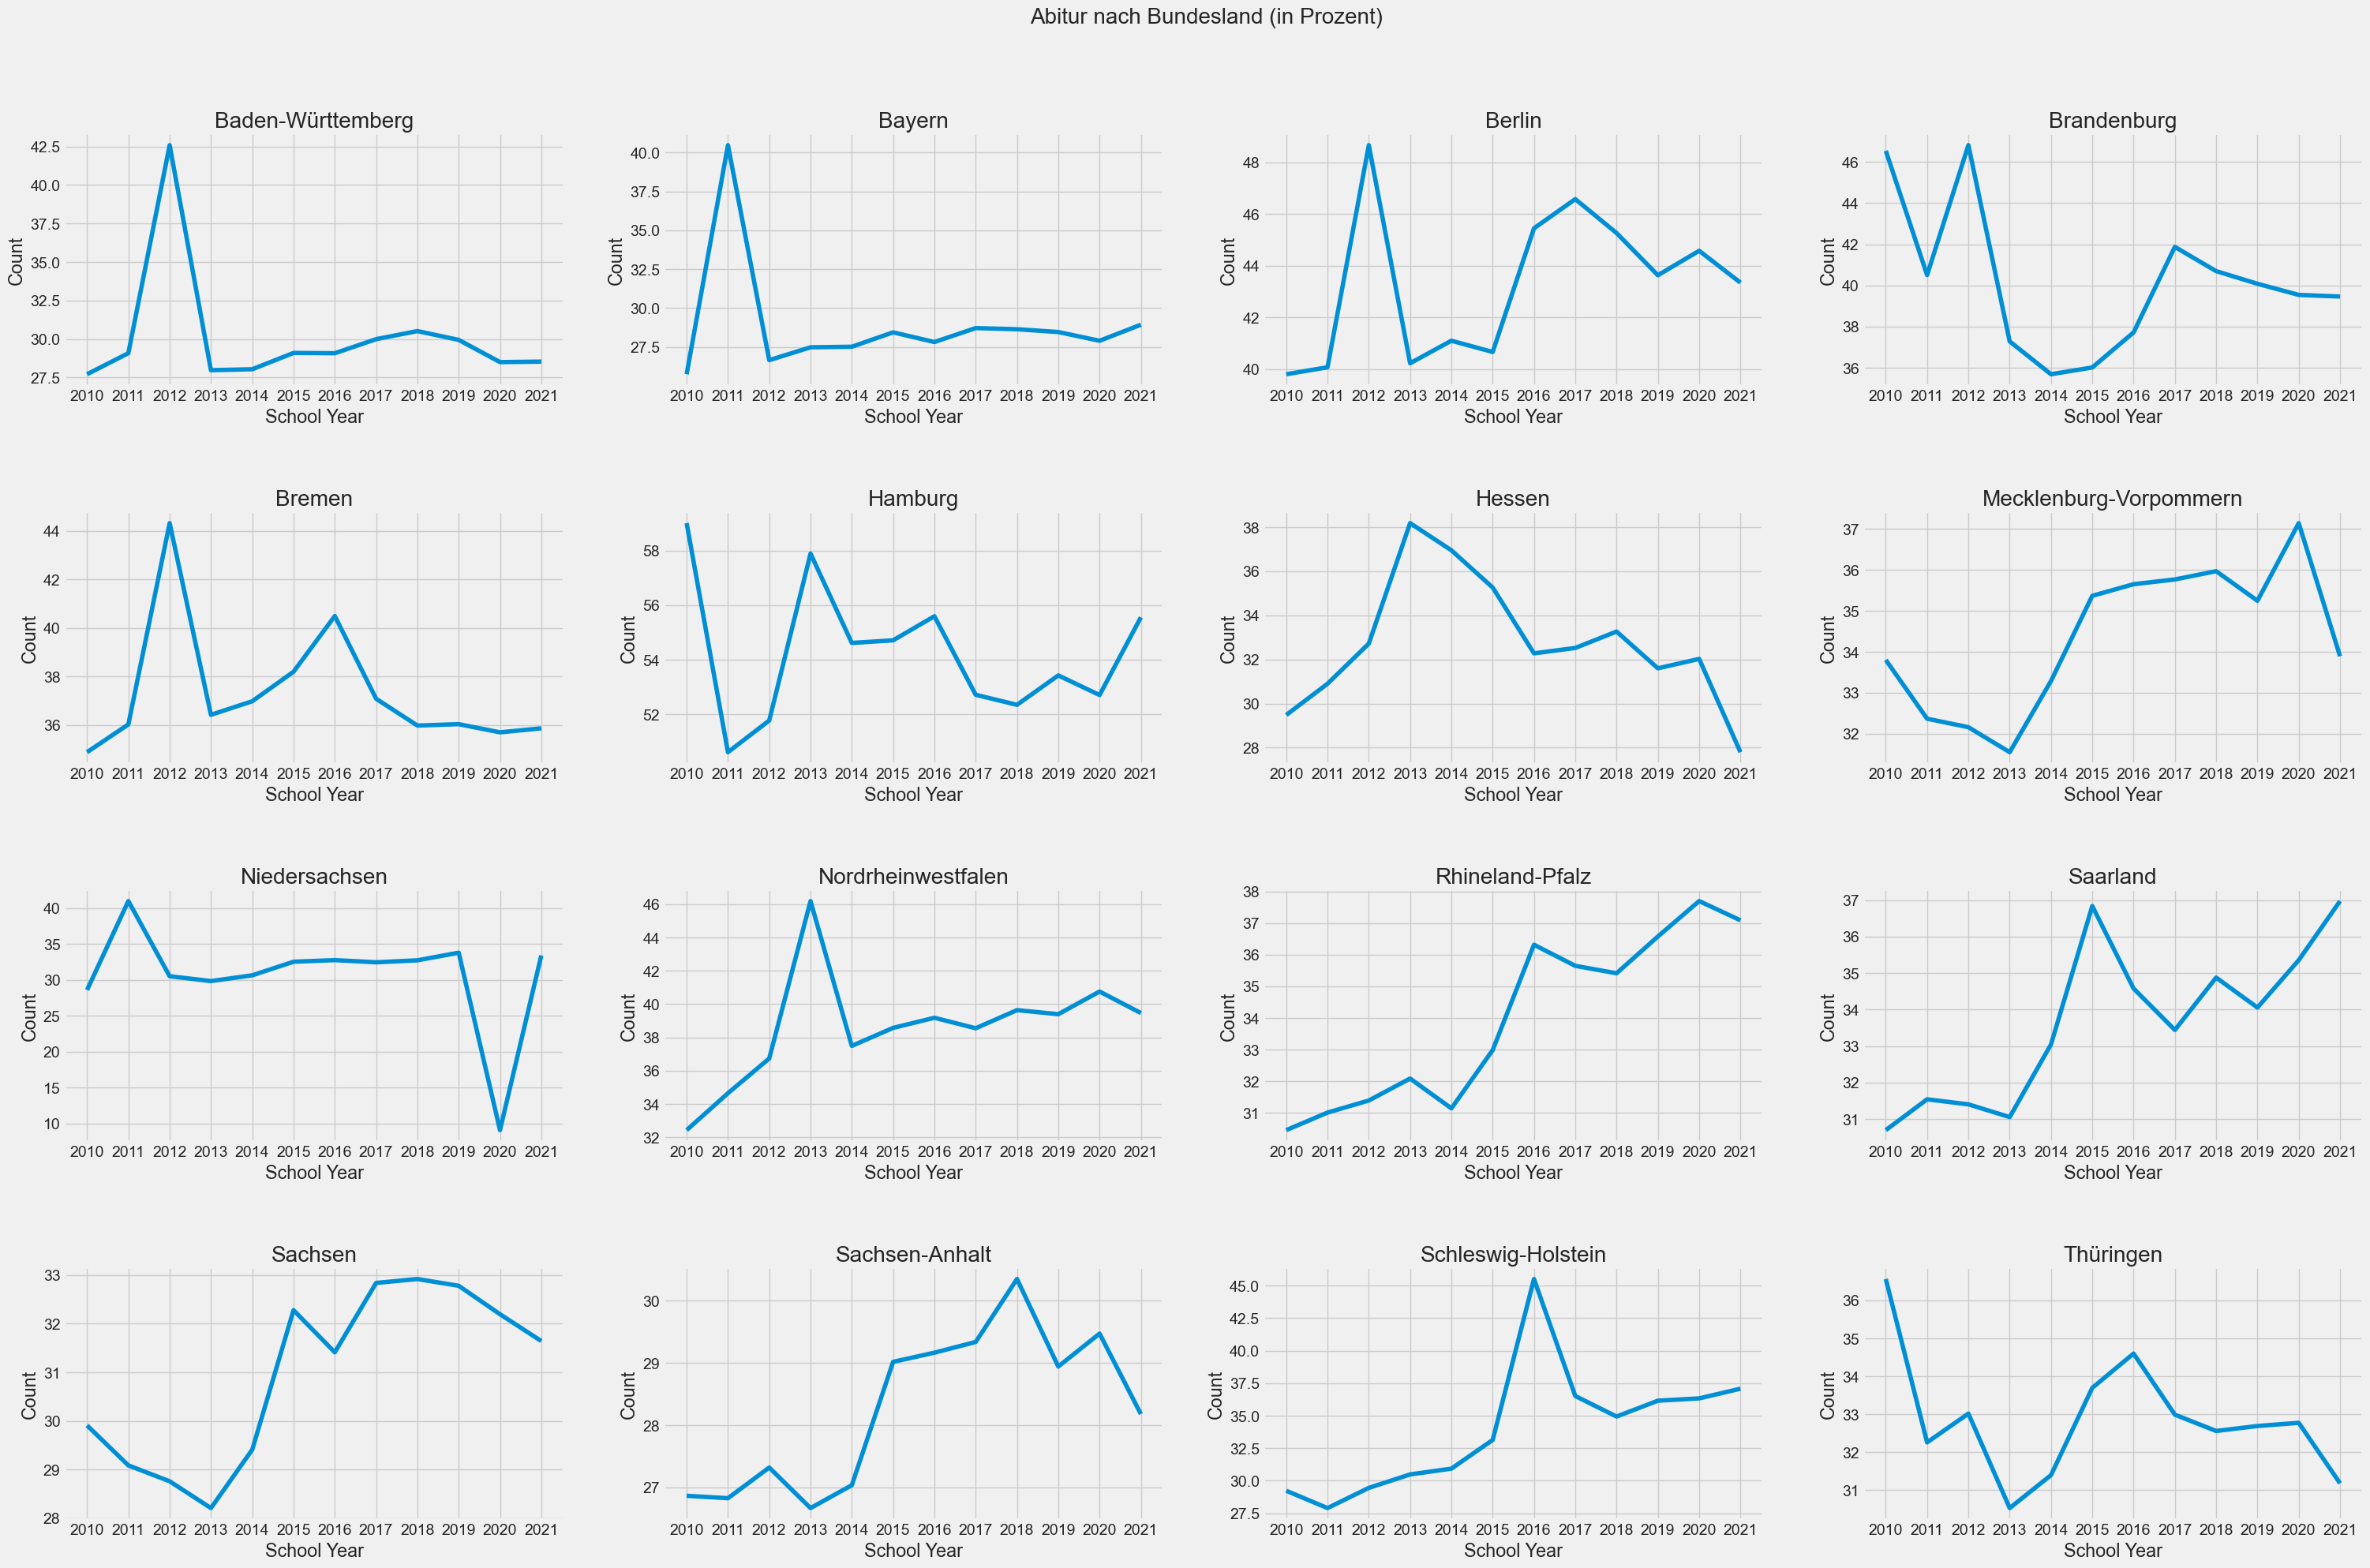

In [86]:
fig, axs = plt.subplots(4, 4, figsize=(30,20)) # create subplots on 2 rows and 3 columns
plt.suptitle('Abitur nach Bundesland (in Prozent)', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

datasets = [    {"state": "Baden-Württemberg", "data": bw_abitur_relativ_only},    
                {"state": "Bayern", "data": bay_abitur_relativ_only},    
                {"state": "Berlin", "data": ber_abitur_relativ_only},    
                {"state": "Brandenburg", "data": bra_abitur_relativ_only},    
                {"state": "Bremen", "data": bre_abitur_relativ_only},    
                {"state": "Hamburg", "data": hh_abitur_relativ_only},    
                {"state": "Hessen", "data": he_abitur_relativ_only},    
                {"state": "Mecklenburg-Vorpommern", "data": mvp_abitur_relativ_only},    
                {"state": "Niedersachsen", "data": ni_abitur_relativ_only},    
                {"state": "Nordrheinwestfalen", "data": nrw_abitur_relativ_only},    
                {"state": "Rhineland-Pfalz", "data": rp_abitur_relativ_only},    
                {"state": "Saarland", "data": saar_abitur_relativ_only},    
                {"state": "Sachsen", "data": sachs_abitur_relativ_only},    
                {"state": "Sachsen-Anhalt", "data": sachs_an_abitur_relativ_only},    
                {"state": "Schleswig-Holstein", "data": sh_abitur_relativ_only},    
                {"state": "Thüringen", "data": thue_abitur_relativ_only},]


for i, dataset in enumerate(datasets):
    row = i // 4
    col = i % 4
    
    axs[row, col].plot(dataset["data"])
    axs[row, col].set_title(dataset["state"])
    axs[row, col].set_xlabel("School Year")
    axs[row, col].set_ylabel("Count")
    axs[row, col].tick_params(axis='x', rotation=0)

plt.show()